## 머신러닝 기본 개념
* 함수란 두 집합 사이의 관계를 설명하는 수학 개념
    + 변수 x와 y가 있을 때, x가 변하면 이에 따라 y는 어떤 규칙으로 변하는지 나타냄
    + 일차 함수는 y가 x에 관한 일차식으로 표현된 경우 의미
* 일차 함수식 $ y = ax + b $에서 $ a $는 기울기, $ b $는 절편
    + 기울기는 기울어진 정도를 의미하는데, x 값이 증가할 때 y 값이 어느 정도 증가하는지에 따라 정해짐
    + 절편은 그래프가 축과 만나는 지점을 의미
* x가 주어지고 원하는 y 값이 있을 때 적절한 a와 b를 찾는 것 - 머신러닝 핵심
* 이차 함수란 y가 x에 관한 이차식으로 표현되는 경우를 의미 - $ y = ax^2 $

In [1]:
from load_ds_module import *

### 최소제곱법
$$ a = \frac{\sum(x_i - \bar x)(y_i - \bar y)}{\sum (x_i - \bar x)^2} $$
$$ b = \bar y - a\bar x$$

In [10]:
# 공부한 시간과 중간고사 성적 데이터를 이용한 예측

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

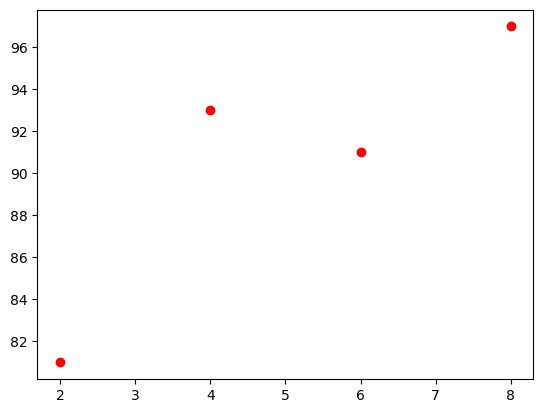

In [9]:
plt.plot(x, y, 'ro')

In [3]:
# 평균 계산
mx = np.mean(x) 
my = np.mean(y)

In [5]:
# 기울기 공식의 분모
divisor = sum([(i - mx) ** 2 for i in x])

In [4]:
# 기울기 공식의 분자
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x, mx, y, my)

In [6]:
# 기울기 a를 구함
a = dividend / divisor
a

2.3

In [7]:
# 절편 b를 구함
b = my - (a * mx)
b

79.0

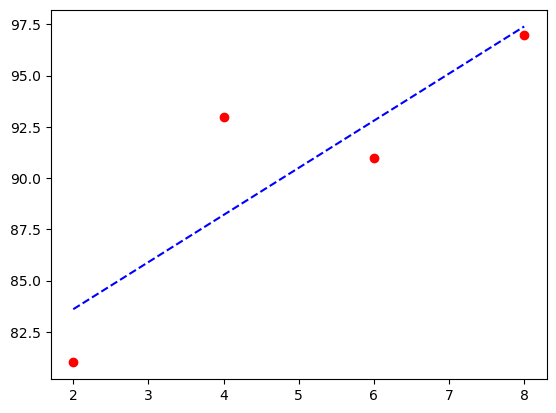

In [11]:
# 최종 결과
z = [a*i + b for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')

# 평균 제곱 오차(Mean Square Error, MSE)
* 오차 = 실제 값 - 예측 값
* 그래프의 기울기가 잘못되었을수록 빨간색 선의 거리의 합, 즉 오차의 합도 커집니다
* 만일 기울기가 무한대로 커지면 오차도 무한대로 커지는 상관관계가 있는 것을 알 수 있음
* 선형 회귀란 임의의 직선을 그어 이에 대한 평균 제곱 오차를 구하고, <br>이 값을 가장 작게 만들어 주는 a 값과 b 값을 찾아가는 작업

In [20]:
# 최소제곱법으로 계산된 기울기와 절편은 2.3, 79임
# 이 때의 평균제곱오차는?
predict_result = []   # 예측값을 저장할 리스트 정의

def predict(x, a, b): # 예측값 계산 함수
    return a * x + b

for i in range(len(x)): # 실제값과 예측값을 비교
    predict_result.append(predict(x[i], a, b))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i], a, b)))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


In [22]:
# 평균 제곱 오차 구하는 함수
def mse(x, y, y_pred):
    n = len(x) 
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력
print("평균 제곱 오차: " + str(mse(x, y, predict_result)))

평균 제곱 오차: 8.299999999999985


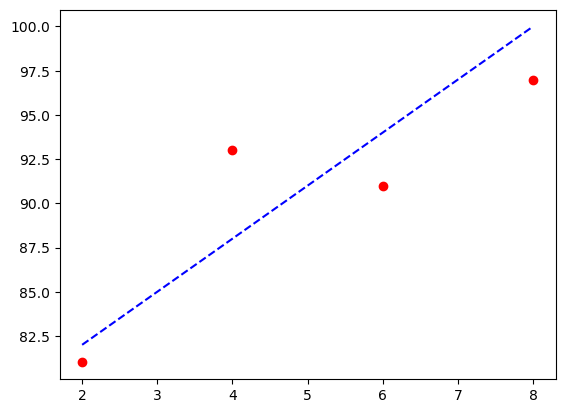

In [12]:
# 가상의 기울기와 절편을 정하고 이것의 평균 오차 계산
# 기울기는 키우고 절편은 낮춤
fake_a = 3
fake_b = 76

z = [fake_a*i + fake_b for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')

In [24]:
predict_result = []
for i in range(len(x)): # 실제값과 예측값을 비교
    predict_result.append(predict(x[i], fake_a, fake_b))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i], fake_a, fake_b)))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [25]:
# 평균 제곱 오차 값을 출력 : 8.29 vs 11.0
print("평균 제곱 오차: " + str(mse(x, y, predict_result)))

평균 제곱 오차: 11.0


In [36]:
fake_a = 3
fake_b = 79

predict_result = []

for i in range(len(x)): 
    predict_result.append(predict(x[i], fake_a, fake_b))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i], fake_a, fake_b)))

공부시간=2, 실제점수=81, 예측점수=85
공부시간=4, 실제점수=93, 예측점수=91
공부시간=6, 실제점수=91, 예측점수=97
공부시간=8, 실제점수=97, 예측점수=103


In [37]:
print("평균 제곱 오차: " + str(mse(x, y, predict_result)))

평균 제곱 오차: 23.0


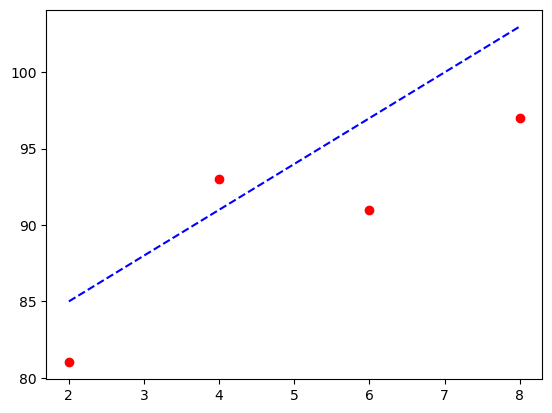

In [38]:
z = [fake_a*i + fake_b for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')

In [32]:
fake_a = 2
fake_b = 76

predict_result = []

for i in range(len(x)): 
    predict_result.append(predict(x[i], fake_a, fake_b))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i], fake_a, fake_b)))

공부시간=2, 실제점수=81, 예측점수=80
공부시간=4, 실제점수=93, 예측점수=84
공부시간=6, 실제점수=91, 예측점수=88
공부시간=8, 실제점수=97, 예측점수=92


In [33]:
print("평균 제곱 오차: " + str(mse(x, y, predict_result)))

평균 제곱 오차: 29.0


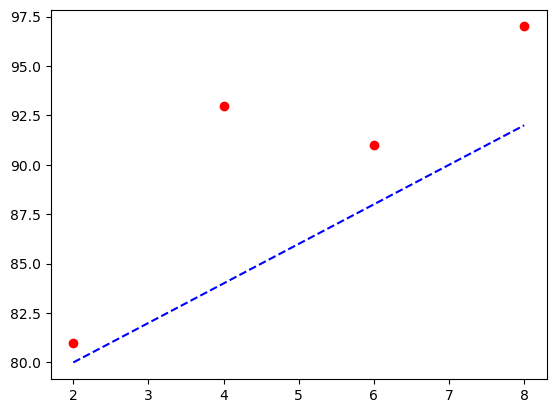

In [35]:
z = [fake_a*i + fake_b for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, z, 'b--')

## 기울기와 오차
* 기울기 a를 너무 크게 잡으면 오차가 커지는 것을 확인함 
* 기울기를 너무 작게 잡아도 오차가 커짐 
* 기울기 a와 오차 사이에는 이렇게 상관관계가 있음
* 기울기가 무한대로 커지거나 무한대로 작아지면 그래프는 y축과 나란한 직선이 됨
* 기울기 a와 오차 사이에는 이차 함수의 관계가 있다는 의미
* 오차가 가장 작을 때는 언제일까요? 그래프의 가장 아래쪽 볼록한 부분에 이르렀을 때임
* 바로 미분 기울기를 이용하는 경사 하강법(gradient decent)
* 우리가 찾는 최솟값 m에서의 순간 기울기
* 그래프가 이차 함수 포물선이므로 꼭짓점의 기울기는 x축과 평행한 선이 됨
* 즉, 기울기가 0입니다. 따라서 우리가 할 일은 ‘미분 값이 0인 지점’을 찾는 것이 됨
* 학습률(learning rate)
* 어느 만큼 이동시킬지 신중히 결정해야 하는데, 이때 이동 거리를 정해 주는 것이 바로 학습률임
* 딥러닝에서 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것은 중요한 최적화 과정 중 하나

### 기울기와 오차간의 관계 시각화

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
weights = []     # 기울기
loss = []        # 오차
b = 0            # 절편은 0으로 편의상 설정

for w in range(-10, 40) :  # 기울기를 -10 ~ 40까지 설정
    xtrain = np.array([2,4,6,8])
    ytrain = np.array([91,93,91,97])   # 실제값
    ytrain_hat = w * xtrain + b        # 예측값
    
    weights.append(w)
    loss.append(np.sqrt(mean_squared_error(ytrain, ytrain_hat)))

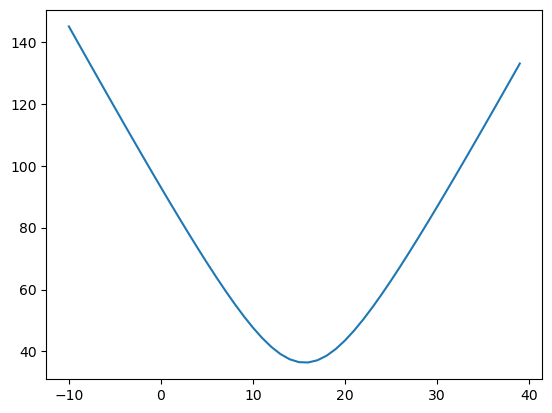

In [41]:
# 결과를 그래프로 시각화
plt.plot(weights, loss)

* y = ax2의 그래프를 x축 방향으로 p만큼, y축 방향으로 q만큼 평행 이동시키면
  점 p와 q를 꼭짓점으로 하는 포물선이 됨
    + 포물선의 맨 아래에 위치한 지점이 최솟값이 되는데, 딥러닝을 실행할 때는 이 최솟값을 찾아내는 과정이 매우 중요
    + 이 최솟값은 4장에 소개할 `최소 제곱법` 공식으로 쉽게 알아낼 수 있음
    + 실제로 머신러닝을 실행할 때 만나는 문제에서는 대부분 최소 제곱법을 활용할 수가 없음
    + 따라서 `미분`과 `기울기`를 이용 (미분, 순간 변화율과 미분계수, 기울기)
* 편미분 - 여러 가지 변수가 식 안에 있을 때, 모든 변수를 미분하는 것이 아니라 우리가 원하는 한 가지 변수만 미분하고 그 외에는 모두 상수로 취급하는 것
* 지수와 지수 함수, 시그모이드 함수, 로그와 로그 함수

### 경사하강법으로 기울기와 절편 찾기

epoch=0, 기울기=27.8400, 절편=5.4300, 오차=8225.0000
epoch=100, 기울기=7.0739, 절편=50.5117, 오차=146.2553
epoch=200, 기울기=4.0960, 절편=68.2822, 오차=27.8259
epoch=300, 기울기=2.9757, 절편=74.9678, 오차=11.0637
epoch=400, 기울기=2.5542, 절편=77.4830, 오차=8.6912
epoch=500, 기울기=2.3956, 절편=78.4293, 오차=8.3554
epoch=600, 기울기=2.3360, 절편=78.7853, 오차=8.3078
epoch=700, 기울기=2.3135, 절편=78.9192, 오차=8.3011
epoch=800, 기울기=2.3051, 절편=78.9696, 오차=8.3002
epoch=900, 기울기=2.3019, 절편=78.9886, 오차=8.3000
epoch=1000, 기울기=2.3007, 절편=78.9957, 오차=8.3000
epoch=1100, 기울기=2.3003, 절편=78.9984, 오차=8.3000
epoch=1200, 기울기=2.3001, 절편=78.9994, 오차=8.3000
epoch=1300, 기울기=2.3000, 절편=78.9998, 오차=8.3000
epoch=1400, 기울기=2.3000, 절편=78.9999, 오차=8.3000
epoch=1500, 기울기=2.3000, 절편=79.0000, 오차=8.3000
epoch=1600, 기울기=2.3000, 절편=79.0000, 오차=8.3000
epoch=1700, 기울기=2.3000, 절편=79.0000, 오차=8.3000
epoch=1800, 기울기=2.3000, 절편=79.0000, 오차=8.3000
epoch=1900, 기울기=2.3000, 절편=79.0000, 오차=8.3000
epoch=2000, 기울기=2.3000, 절편=79.0000, 오차=8.3000


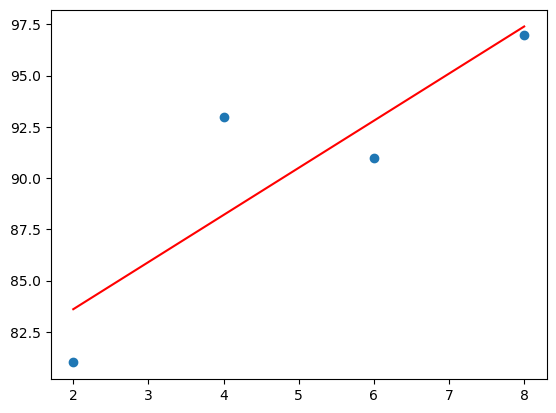

In [43]:
# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 전체데이터를 대상으로 학습을 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):      # 에포크 수만큼 반복합니다.
    y_pred = a * x + b       # 예측 값을 구하는 식입니다.
    error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:      # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f, 오차=%.04f" % (i, a, b, mse(x, y, y_pred)))
        
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      


# 공부 시간 X와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')